<a href="https://colab.research.google.com/github/jinsugyeong/AI_interactive_hometraining/blob/main/PART1/codeit/ml/250721_%EB%A8%B8%EC%8B%A0_%EB%9F%AC%EB%8B%9D%2C_%EB%8D%94_%EB%B9%A0%EB%A5%B4%EA%B3%A0_%EC%A0%95%ED%99%95%ED%95%98%EA%B2%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 전처리 (Feature Scaling)

## 정규화(Normalization)

데이터 전처리 : 데이터를 그대로 사용하지 않고, 조금 가공해서 머신 러닝 모델을 학습시키기 더 좋은 형식으로 만들어 주는 것


### Feature Scaling

- feature = 입력변수의 크기를 , scale = 조정해 준다
- 예를 들어서, 연봉이라는 입력 변수가 있고 나이라는 입력 변수가 있다고 가정
  - 사람의 연봉은 보통 몇천만 원 하지만 사람의 나이는 몇십 살밖에 안 됨
  - 입력 변수의 규모 단위가 너무 차이가 나면 머신 러닝에 방해가 될 수 있기 때문에
  - eature scaling을 해서 입력 변수들의 크기가 모두 일정 범위 내에 들어오도록 조정

### Min-Max Normalization
- 숫자의 크기를 0과 1사이로 만든다
- 이터의 minimum, 즉 최솟값, 그리고 maximum, 즉 최댓값을 이용
- $\displaystyle
x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$
  - $x_{new}$는 normalization을 한 데이터
  - $x_{old}$는  normalization을 하기 전 데이터
  - $x_{max}$는 데이터 최댓값
  - $x_{min}$는 데이터 최솟값

###  scikit-learn으로 Normalization 해보기



In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

NBA_FILE_PATH='/content/NBA_player_of_the_week.csv'
nba_player_of_the_week_df = pd.read_csv (NBA_FILE_PATH)

In [2]:
nba_player_of_the_week_df.head()

,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season
0,Jayson Tatum,Boston Celtics,East,"Feb 10, 2020",SF,6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1
1,Nikola Jokic,Denver Nuggets,West,"Feb 10, 2020",C,7'0,250,25,2014,4,2019-2020,2020,KK Mega Bemax (Serbia),0.5,213,113,1
2,Jaylen Brown,Boston Celtics,East,"Feb 3, 2020",SF,6'7,220,23,2016,3,2019-2020,2020,California,0.5,201,99,1
3,Damian Lillard,Portland Trail Blazers,West,"Feb 3, 2020",G,6'3,195,29,2012,7,2019-2020,2020,Weber State,0.5,190,88,1
4,Pascal Siakam,Toronto Raptors,East,"Jan 27, 2020",F,6'9,230,25,2016,3,2019-2020,2020,New Mexico State,0.5,206,104,1


In [3]:
nba_player_of_the_week_df.describe()

,Weight,Age,Draft Year,Seasons in league,Season short,Real_value,Height CM,Weight KG,Last Season
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,224.567164,26.738060,1996.287313,5.740299,2003.156716,0.686940,201.071642,101.384328,0.023881
std,30.798885,3.400683,11.253558,3.293421,11.470164,0.242007,9.367970,14.011226,0.152734
min,150.000000,19.000000,1965.000000,0.000000,1980.000000,0.500000,175.000000,68.000000,0.000000
25%,205.000000,24.000000,1987.000000,3.000000,1994.000000,0.500000,193.000000,93.000000,0.000000
50%,220.000000,26.000000,1998.000000,5.000000,2005.000000,0.500000,201.000000,99.000000,0.000000
75%,250.000000,29.000000,2005.000000,8.000000,2013.000000,1.000000,208.000000,113.000000,0.000000
max,325.000000,40.000000,2018.000000,17.000000,2020.000000,1.000000,229.000000,147.000000,1.000000


In [7]:
height_weight_age_df = nba_player_of_the_week_df [['Height CM', 'Weight KG', 'Age']]
height_weight_age_df.head()

,Height CM,Weight KG,Age
0,203,94,21
1,213,113,25
2,201,99,23
3,190,88,29
4,206,104,25


In [9]:
scaler = preprocessing.MinMaxScaler() #데이터를 0과 1 사이로 바꿔줌
normalized_data = scaler.fit_transform(height_weight_age_df)
normalized_data

array([[0.51851852, 0.32911392, 0.0952381 ],
       [0.7037037 , 0.56962025, 0.28571429],
       [0.48148148, 0.39240506, 0.19047619],
       ...,
       [0.48148148, 0.37974684, 0.23809524],
       [0.38888889, 0.21518987, 0.23809524],
       [0.42592593, 0.27848101, 0.52380952]])

In [11]:
normalized_df = pd.DataFrame(normalized_data, columns=['Height CM', 'Weight KG', 'Age'])
normalized_df.describe()

,Height CM,Weight KG,Age
count,1340.000000,1340.000000,1340.000000
mean,0.482808,0.422586,0.368479
std,0.173481,0.177357,0.161937
min,0.000000,0.000000,0.000000
25%,0.333333,0.316456,0.238095
50%,0.481481,0.392405,0.333333
75%,0.611111,0.569620,0.476190
max,1.000000,1.000000,1.000000


## 경사 하강법

feature scaling을 하는 이유 : 경사 하강을 더 빨리할 수 있도록 도와주기 때문


<br>

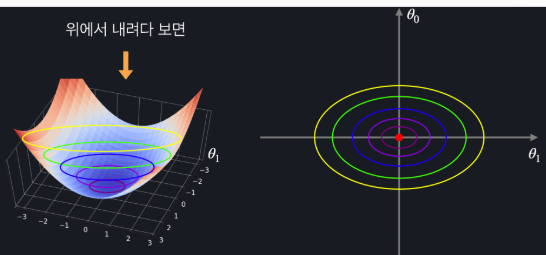

- 이어진 하나의 선에
- 있는 점들은 모두 같은 높이 에 있는 점들
- 이런 걸 ‘등고선’이라고 함
- 따라서 노랑, 초록, 파랑, 남색, 보라 순서대로 더 낮은 지점, 즉 손실이 더 작은 부분을 나타내고 중간에 빨간 점은 손실이 가장 작은 부분, 최소점을 나타냅니다.
- 특정 지점에서 경사가 가장 가파른 방향은 등고선과 수직이 되는 방향
  - 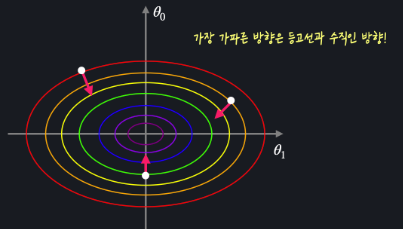
- 아웃풋에 큰 영향을 준다는 것은 결국 평균 제곱 오차, 혹은 손실 함수에도 큰 영향을 준다는 뜻
   - 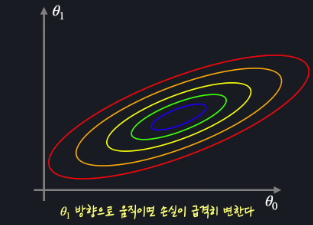
  - $\theta_1$방향으로 조금만 움직여도 손실이 급격히 증가하거나 감소
- 예를 들어 normalization을 적용해서 연봉을 0과 1사이의 숫자들로 바꿔주면 $\theta_0$과 $\theta_1$에 비슷한 숫자들이 곱해지기 때문에 손실함수에 비슷한 영향을 주게 됨
  - 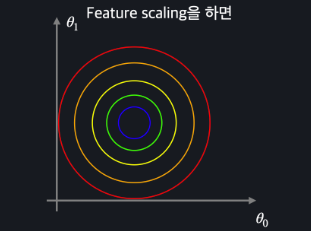
- 두 그래프에 경사하강을 하면
  - 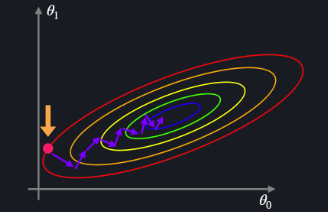
    - 많은 지점에서 경사가 가장 가파른 방향은 최소점을 향하는 방향이 아니기 때문에 지그재그 모양으로 그래프를 내려오게 됨
  
  - 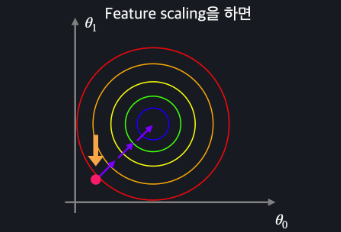
    - 어떤 지점이든 경사가 가장 가파른 방향이 최소점을 향하는 방향이기 때문에 가장 가파른 경사를 따라서 내려오면 위처럼 반듯하게 내려올 수 있음

## 표준화(Standardization)


#### 평균(mean)  
$\displaystyle \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n}$

<br>

#### 표준 편차(standard deviation)
$\displaystyle \sigma = \sqrt{\frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \cdots + (x_n - \bar{x})^2}{n}}$

<br>

#### 표준화
$\displaystyle x_{new} = \frac{x_{old} - \bar{x}}{\sigma}$
- $x_{new}$는 표준화한 데이터, $x_{old}$는 표준화하기 전 데이터, $\bar{x}$는 데이터의 평균, $\sigma$는 데이터의 표준 편차
- 표준화를 하면 항상 새로운 데이터의 평균은 0, 표준 편차는 1이됨
- 이렇게 표준화를 해 준 데이터를 통계학에서는 z-score함
- z-score는 데이터가 평균 값에서 몇 표준 편차만큼 떨어져 있는지를 뜻함
  - 예를 들어 180의 z-score는 1.164인데, 이건 "180은 평균값보다 1.164 표준 편차만큼 크다"라는 뜻
  - 실제로 계산해 보면,  173.8 + 1.164 × 5.325 = 180


### scikit-learn으로 Standardization 하기

In [12]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [16]:
NBA_FILE_PATH = 'NBA_player_of_the_week.csv'
# 소수점 5번째 자리까지만 출력되도록 설정
pd.set_option('display.float_format', lambda x: '%.5f' % x)

nba_player_of_the_week_df = pd.read_csv(NBA_FILE_PATH)
height_weight_age_df = nba_player_of_the_week_df[['Height CM', 'Weight KG', 'Age']]

# 데이터를 standardize 함
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(height_weight_age_df)

standardized_df = pd.DataFrame(standardized_data, columns=['Height', 'Weight', 'Age'])

In [17]:
standardized_df.describe()

,Height,Weight,Age
count,1340.00000,1340.00000,1340.00000
mean,-0.00000,-0.00000,-0.00000
std,1.00037,1.00037,1.00037
min,-2.78410,-2.38357,-2.27629
25%,-0.86194,-0.59862,-0.80545
50%,-0.00765,-0.17024,-0.21711
75%,0.73986,0.82934,0.66539
max,2.98237,3.25687,3.90124


 모든 열이 평균은 0, 그리고 표준 편차는 1을 갖도록 제대로 Standardize 된 것을 확인

## One-hot Encoding

머신 러닝에 사용되는 데이터의 종류
- 수치형(numerical) 데이터: 나이, 몸무게, 키
- 범주형(categorical) 데이터: 혈액형, 성별
- 많은 머신 러닝 알고리즘은 인풋 데이터, 즉 입력 변수의 값이 수치형 데이터여야 함
- 범주형 데이터가 있을 때는 어떻게 해야 할까?
  - 예를 들어 A형은 1, AB형은 2, B형은 3, O형은 4. 이런 식으로 데이터를 변환
  - 하지만 이렇게 데이터를 바꿔 주면 혈액형에 크고 작다는 개념이 생겨버림
  - 머신 러닝 알고리즘은 이런 엉뚱한 관계도 학습하기 때문에 오히려 예측에 방해가 될 수 있음
- One-hot encoding은 각 카테고리를 하나의 새로운 열로 만들어 주는 방법
  - 예를 들어 혈액형이라는 열에는 A형, AB형, B형, O형 네 카테고리가 있으니까 이걸 4개의 새로운 열로 만들어 주는 방법
  - 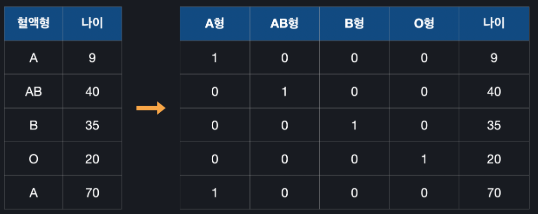
  - 주어진 데이터가 어떤 혈액형인지에 따라 새로운 열들의 값을 0 또는 1로 채워
-  one-hot encoding을 하면 범주형 데이터에게 크고 작음의 엉뚱한 관계가 생기는 걸 방지하면서도 수치형 데이터로 바꿔 줄 수

### pandas로 One-hot Encoding 해보기

In [25]:
import pandas as pd

# 타이타닉 데이터 불러오기
TITANIC_FILE_PATH = '/content/titanic.csv'
titanic_df = pd.read_csv(TITANIC_FILE_PATH)
titanic_df.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [29]:
titanic_sex_embarked = titanic_df[['Sex', 'Embarked']]
titanic_sex_embarked.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [30]:
one_hot_encoded_df = pd.get_dummies(titanic_sex_embarked)
one_hot_encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True


In [31]:
# 원하는 열들만 one-hot encoding 하기
one_hot_encoded_df = pd.get_dummies(data=titanic_df, columns=['Sex', 'Embarked'])
one_hot_encoded_df.head()

,Unnamed: 0,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.25000,NaN,False,True,False,False,True
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.28330,C85,True,False,True,False,False
2,2,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.92500,NaN,True,False,False,False,True
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.10000,C123,True,False,False,False,True
4,4,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.05000,NaN,False,True,False,False,True


# 2. 정규화 (Regularization)

## 편향(Bias)과 분산(Variance)


### 편향

- 사람의 키를 이용해서 몸무게를 예측하고 싶다고 하자
- 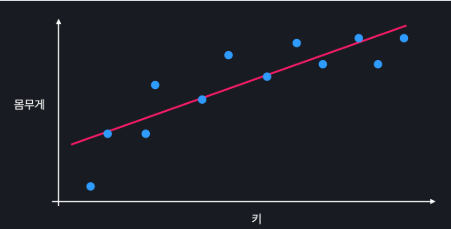
  - 선형회귀를 사용해서 training 데이터에서 위와 같은 관계 배움 > 키가 늘어날 때 몸무게가 같이 늘어나지만, 일정 키부터는 몸무게가 잘 안 늘어남
- 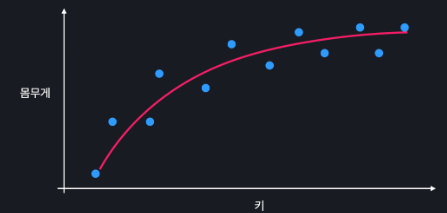
  - 곡선이 데이터를 더 정확하게 표현함
  - 처음에 본 직선 모델의 문제는 모델이 너무 간단해서 아무리 학습을 해도 위와 같은 곡선 관계를 나타내지 못함 > 모델의 한계
  - 모델이 너무 간단해서 데이터의 관계를 잘 학습하지 못하는 경우 모델의 편향이 높다고 함
- 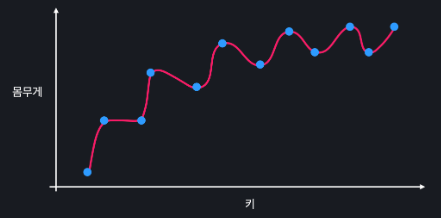
  - 편향이 작은 모델
  - 높은 차항의 회귀를 사용해서 관계 학습
  - 이 복잡한 곡선은 training 데이터에 거의 완벽히 맞춰져 있음
  - 모델의 복잡도를 늘려서 training 데이터의 관계를 잘 학습할 수 있도록 함
  - 이 모델은 편향이 낮은 모델이라고 할 수 있음



<br>

### 분산
- 위에서 봤던 직선 모델과 복잡한 곡선 모델을 이용해서 처음 보는 test 데이터의 몸무게를 예측해 본다고 가정
- 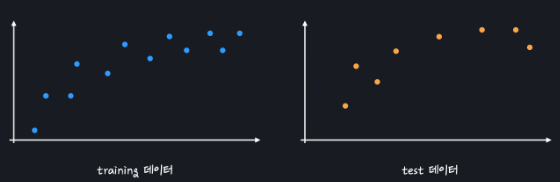
  - 왼쪽은 training 데이터, 오른쪽은 test 데이터
- 평균 제곱 오차를 사용해서 모델의 성능을 평가
- 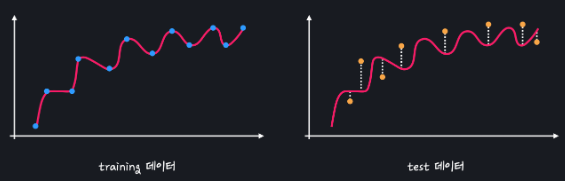
  - 이 모델은 training 데이터에 대해서는 거의 완벽한 성능을 보이지만 test 데이터에 대해서는 상당히 안 좋은 성능을 보임
  - 모델이 오히려 너무 복잡해서 문제가 생김
  - 델이 training 데이터를 가지고 학습할 때 키와 몸무게의 관계를 배우기보다는 아예 데이터 자체를 외워버리기 때문에 처음 보는 데이터 셋에 모델을 적용해 보면 성능이 아주 떨어짐
- 데이터 셋 별로 모델이 얼마나 일관된 성능을 보여주는지를 분산이라고 함
- 다양한 데이터 셋 간에 성능 차이가 많이 나면 분산이 높다고 하고, 성능이 비슷하면 분산이 낮다고 함
  - 복잡한 곡선 모델은 데이터 셋마다 성능 차이가 많이 나니까 분산이 높음
- 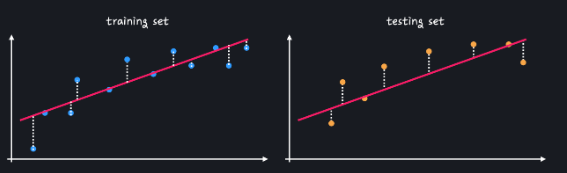
 - training set을 사용했을 때랑, test set을 사용했을 때 성능에 큰 차이가 없음
 - 다양한 데이터 셋을 사용해도 일관된 성능을 보임 > 따라서 직선 모델은 분산이 작음

### 편향-분산 트레이드오프 (Bias-Variance Tradeoff)


- 일반적으로 편향과 분산은 하나가 줄어들수록 다른 하나는 늘어나는 관계
- 과소적합과 과적합의 적당한 밸런스를 찾아내는 게 중요

### scikit-learn으로 과적합 문제 직접 보기

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from math import sqrt

import numpy as np
import pandas as pd

In [36]:
ADMISSION_FILE_PATH = '/content/admission_data.csv'
admission_df = pd.read_csv(ADMISSION_FILE_PATH).drop('Serial No.', axis=1)

In [37]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.50000,4.50000,9.65000,1,0.92000
1,324,107,4,4.00000,4.50000,8.87000,1,0.76000
2,316,104,3,3.00000,3.50000,8.00000,1,0.72000
3,322,110,3,3.50000,2.50000,8.67000,1,0.80000
4,314,103,2,2.00000,3.00000,8.21000,0,0.65000


In [45]:
X = admission_df.drop(['Chance of Admit '], axis=1)

polynomial_transformer = PolynomialFeatures (6)
polynomial_features = polynomial_transformer.fit_transform (X.values)
features = polynomial_transformer.get_feature_names_out(X.columns)

X = pd.DataFrame(polynomial_features, columns=features)
X.head()

,1,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GRE Score^2,GRE Score TOEFL Score,...,LOR CGPA^2 Research^3,LOR CGPA Research^4,LOR Research^5,CGPA^6,CGPA^5 Research,CGPA^4 Research^2,CGPA^3 Research^3,CGPA^2 Research^4,CGPA Research^5,Research^6
0,1.00000,337.00000,118.00000,4.00000,4.50000,4.50000,9.65000,1.00000,113569.00000,39766.00000,...,419.05125,43.42500,4.50000,807539.69608,83682.87006,8671.80001,898.63213,93.12250,9.65000,1.00000
1,1.00000,324.00000,107.00000,4.00000,4.00000,4.50000,8.87000,1.00000,104976.00000,34668.00000,...,354.04605,39.91500,4.50000,487014.30626,54905.78425,6190.05459,697.86410,78.67690,8.87000,1.00000
2,1.00000,316.00000,104.00000,3.00000,3.00000,3.50000,8.00000,1.00000,99856.00000,32864.00000,...,224.00000,28.00000,3.50000,262144.00000,32768.00000,4096.00000,512.00000,64.00000,8.00000,1.00000
3,1.00000,322.00000,110.00000,3.00000,3.50000,2.50000,8.67000,1.00000,103684.00000,35420.00000,...,187.92225,21.67500,2.50000,424731.61094,48988.65178,5650.36353,651.71436,75.16890,8.67000,1.00000
4,1.00000,314.00000,103.00000,2.00000,2.00000,3.00000,8.21000,0.00000,98596.00000,32342.00000,...,0.00000,0.00000,0.00000,306237.90335,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [46]:
y = admission_df[['Chance of Admit ']]
y.head()

,Chance of Admit
0,0.92000
1,0.76000
2,0.72000
3,0.80000
4,0.65000


In [48]:
#다항회귀
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [50]:
# 선형회귀 모델을 만들어서 트레이닝 모델로 학습 시키기
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# 예측값
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_train, y_train_predict)
print("training set에서의 성능")
print("-------------------" )
print(sqrt(mse))

mse = mean_squared_error(y_test, y_test_predict)

print("test set에서의 성능")
print("-------------------" )
print(sqrt(mse))

training set에서의 성능
-------------------
0.02037302765388292
test set에서의 성능
-------------------
1.1320864696874797


## 정규화 (Regularization)

- 복잡한 모델을 그대로 학습시키면 과적합이 되기 마련
- 정규화는 학습 과정에서 모델이 과적합 되는 것을 예방
- 과적합된 함수는 보통 위아래로 엄청 왔다 갔다 한다는 특징
  - 함수의 계수, 즉 가설 함수의 θ 값들이 굉장히 크다는 뜻
- 정규화는 모델을 학습시킬 때 θ 값들이 너무 커지는 것을 방지
  - training 데이터에 대한 오차는 조금 커질 수 있

###  L1, L2 정규화

- 머신러닝에서 정규화는 손실 함수에 ‘정규화 항’이라는 것을 더해서 θ값들이 커지는 것을 방지하는 기법
- 손실함수는 데이터에 가장 잘 맞는 선 $\displaystyle h_\theta(x) = \theta_0 + \theta_1 x + \cdots + \theta_n x^n$을 찾는게 목표
  - 데이터에 대한 평균 제곱 오차를 최소화한다는 뜻
  - $\displaystyle \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$ 와같이 계산
    - $m$은 데이터 개수, $h_\theta(x^{(i)})$는 $i$번째 데이터의 (목표 변수의) 예측값, $y^{(i)}$는 $i$번째 데이터의 (목표 변수의) 실제 값을 나타냄
  * 계산의 편의를 위해 평균 제곱 오차를 2로 나눠주면 손실 함수 $J(\theta)$가 나옴
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$
  - 다항 회귀는 평균 제곱 오차를 손실 함수로 쓰니까 “training 데이터에 대한 평균 제곱 오차가 작을수록 좋은 가설 함수다
- 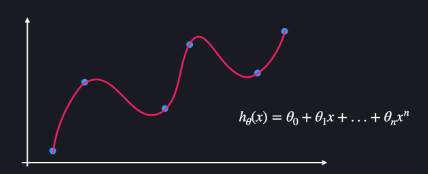
  - 위 모델은 이전에 봤듯이 training 데이터에 대한 오차는 굉장히 작지만 test 데이터에 대한 오차는 굉장히 큼
  - 모델의 θ 값들이 너무 커서 training 데이터에 과적합 됨
  - 문제 해결을 위해 가설 함수의 기준을 바꿔줘야 함!
    - **‘training 데이터에 대한 오차도 작고 θ값들도 작아야 좋은 가설 함수다’.**

 <br>

* 손실 함수 $J$는 값이 클수록 가설 함수가 안 좋다는 뜻이기 때문에 아래와 같이 손실 함수에 $\theta$값들의 절댓값, 또는 크기를 더해 주면 됨
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 + |\theta_1| + |\theta_2| + \cdots |\theta_n|$
   * 주의해야 할 점은 $\theta_0$은 과적합과 상관이 없기 때문에 $\theta_0$의 절댓값은 더해주지 않음
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 + \sum_{i=1}^{n}|\theta_i|$
   * $\theta$값들이 커질수록 손실 함수도 커지고, $\theta$값들이 작아질수록 손실 함수도 작아짐

<br>

* 그런데 사실 정규화 항에는 $\theta$값들이 커지는 것에 대해서 얼마나 많은 페널티를 줄 건지 정해주는 $\lambda$라는 상수를 곱해줌
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{i=1}^{n}|\theta_i|$
   * 예를 들어 $\lambda$가 100이면 $\theta$값들이 조금만 커져도 손실 함수가 굉장히 커지기 때문에 $\theta$값을 줄이는 게 중요
   * $\lambda$가 0.01이면 $\theta$값들이 커져도 손실 함수는 별로 안 커지기 때문에 평균 제곱 오차를 줄이는 게 중요

   <br>

* 여태까지 본 정규화 방식을 L1 정규화라고 함. 손실 함수에 아래와 같은 정규화 항을 더해 줌
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{i=1}^{n}|\theta_i|$
   * L1 정규화를 사용하는 회귀 모델을 Lasso 회귀 모델, 줄여서는 Lasso 모델이라고 함
* L2 정규화는 아래와 같은 정규화 항을 더해줌
   * $\displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{i=1}^{n}\theta_i^2$
   * $\theta$값의 절댓값이 아닌 제곱 값을 더해줌
   * L1 정규화와 마찬가지로 $\theta$값들이 커지면 손실이 커지기 때문에 $\theta$값들이 커지는 것을 방지
   * L2 정규화를 사용하는 회귀 모델은 Ridge 회귀 모델, 또는 Ridge 모델이라고 함

#### scikit-learn으로 과적합 문제 해결해 보기

In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from math import sqrt

import numpy as np
import pandas as pd

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [63]:
model = Lasso(alpha=0.001, max_iter=1000, normalize=True) #L1 정규화
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.132e-01, tolerance: 7.568e-04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [64]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [65]:
mse = mean_squared_error(y_train, y_train_predict)
print("training set에서의 성능")
print("-------------------" )
print(sqrt(mse))

mse = mean_squared_error(y_test, y_test_predict)

print("test set에서의 성능")
print("-------------------" )
print(sqrt(mse))

training set에서의 성능
-------------------
0.05389371888907575
test set에서의 성능
-------------------
0.06689735278061708


 #### L1, L2 정규화 일반화

 - 정규화는 모델의 파라미터 (즉 학습을 통해 찾고자 하는 값들 - 회귀의 경우 θ)에 대한 손실 함수를 최소화 하는 모든 알고리즘에 적용할 수 있다
  - 다중 회귀, (다중) 다항 회귀, 로지스틱 회귀 모델 모두에 정규화를 적용할 수 있다
  - 그냥 모델에 해당하는 손실 함수에 정규화 항 $\displaystyle \lambda\sum_{i=1}^{n}|\theta_i|$ 또는 $\displaystyle \lambda\sum_{i=1}^{n}\theta_i^2$ 을 더해주면 됨
  - scikit-learn같은 라이브러리를 사용해서 실제로 모델을 만들 때는 알아서 정규화를 적용해 주는 모델을 사용하면 됨
    - 다중 회귀 또는 다항 회귀 모델을 만들 때는 LinearRegression 대신 Lasso (L1 정규화) 또는 Ridge (L2 정규화) 모델을 사용하면 됨
    - LogisticRegression 모델은 사실 자동으로 L2 정규화를 적용함
    ```
    LogisticRegression(penalty='none')  # 정규화 사용 안함
    LogisticRegression(penalty='l1')  # L1 정규화 사용
    LogisticRegression(penalty='l2')  # L2 정규화 사용
    LogisticRegression()  # 위와 똑같음: L2 정규화 사용
    ```

#### L1, L2 정규화 차이점

* L1 정규화는 여러 $\theta$값들을 0으로 만들어 줍니다. 모델에 중요하지 않다고 생각되는 속성들을 아예 없애주는 거죠.
  -  L1 정규화는 어떤 모델에 쓰이는 속성 또는 변수의 개수를 줄이고 싶을 때 사용
* L2 정규화는 $\theta$값들을 0으로 만들기보다는 조금씩 줄여 줍니다. 모델에 사용되는 속성들을 L1처럼 없애지는 않는 거죠.

# 3. 모델 평가와 하이퍼파라미터 고르기

## k겹 교차 검증 (k-fold cross validation)

- 전체 데이터를 k 개의 같은 사이즈로 나누고 (예를 들어 k=5)
- 이 데이터 셋들을 이용해서 모델의 성능을 여러 번 검증
- 맨 처음에는 가장 위에/앞에 있는 데이터 셋을 test로 사용하고, 나머지를 training set으로 사용
- 그다음에는 두 번째 데이터 셋을 test set으로 사용합니다. 나머지 4개를 training set으로 사용해서 다시 모델을 학습시키고, 성능을 파악
- 이 과정을 모든 데이터 셋에 반복
- 그러면 5개의 테스트 셋에 대한 성능 생김 > 이 성능 5개의 평균을 모델 성능으로 검증해서 신뢰도 올라감

### scikit-learn으로 k겹 교차 검증 해보기

In [66]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category FutureWarning) #경고메세지 출력 방지

In [67]:
iris_data = datasets.load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame (iris_data.target, columns=['Class'])

In [68]:
#로지스틱 회귀 모델
logistic_model = LogisticRegression(max_iter=2000)

In [70]:
np.average(cross_val_score(logistic_model, X, y.values.ravel(), cv=5))

np.float64(0.9733333333333334)

## 그리드 서치 (Grid Search)

### 하이퍼 파라미터 (Hyperparameter)

- 미리 정해 주어야 하는 변수 또는 파라미터
- Lasso 에서도 alpha랑 max_iter 같은 모델이 직접 학습해서 배우는 게 아니라 모델을 만드는 사람이 미리 정해줘야 되는 변수
- scikit-learn에서는 보통 모델을 만들 때 옵셔널 파라미터로 정해주는 변수
- 하이퍼 파라미터에 어떤 값을 넣느냐에 따라 모델의 성능에 큰 차이가 있을 수 있기 때문에 모델의 성능을 최대한 높여주는 하이퍼 파라미터를 고르는 게 굉장히 중요
- 좋은 하이퍼 파라미터를 고르는 방법 중 하나는 그리드 서치라는 방법

<br>

### 그리드 서치 (Grid Search)
- 우선 정해줘야 하는 각 하이퍼 파라미터에 넣어보고 싶은 후보 값을 몇 개씩 정함
- 그리고 모든 후보 값의 조합으로 모델을 학습시켰을 때 성능이 가장 좋았던 하이퍼 파라미터 조합을 고름

### scikit-learn 으로 그리드 서치 해보기

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from math import sqrt
import numpy as np
import pandas as pd

In [77]:
#데이터 준비
ADMISSION_FILE_PATH = '/content/admission_data.csv'
admission_df = pd.read_csv(ADMISSION_FILE_PATH)

X = admission_df.drop('Chance of Admit ', axis=1)

polynomial_transformer = PolynomialFeatures(2)#2 차식 변형기를 정의한다
polynomial_features = polynomial_transformer.fit_transform(X.values)

features = polynomial_transformer.get_feature_names_out(X.columns)

X = pd.DataFrame(polynomial_features, columns=features)
y = admission_df[['Chance of Admit ']]

In [79]:
hyper_parameter = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

In [80]:
lasso_model = Lasso()

In [81]:
hyper_parameter_tuner = GridSearchCV(lasso_model, hyper_parameter, cv=5)
hyper_parameter_tuner.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.254e-01, tolerance: 6.706e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.427e-01, tolerance: 8.246e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.268e-01, tolerance: 8.590e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

In [82]:
hyper_parameter_tuner.best_params_

{'alpha': 1, 'max_iter': 100}